# CASE BASED - 01 (Pembelajaran Mesin)

---

Berlian Muhammad Galin Al Awienoor - 1301204378 - IF-44-10


Dataset : arrythmia (NIM Genap)

---
https://drive.google.com/drive/folders/1V1fbY2YWxbgsTd3T9afNhe17T7ILB2YN


# === Download Dataset dari Google Drive === 

In [ ]:
# https://drive.google.com/file/d/1YiKKjFouaVyz8mIMRxKiDGY0rbhL2Oo9/view?usp=sharing
# https://drive.google.com/file/d/1pHuiTUZgppq_R8U8leEplkY_YaQTfia4/view?usp=sharing

!gdown 1YiKKjFouaVyz8mIMRxKiDGY0rbhL2Oo9
!gdown 1pHuiTUZgppq_R8U8leEplkY_YaQTfia4

Downloading...
From: https://drive.google.com/uc?id=1YiKKjFouaVyz8mIMRxKiDGY0rbhL2Oo9
To: /content/arrhythmia.data
100% 402k/402k [00:00<00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pHuiTUZgppq_R8U8leEplkY_YaQTfia4
To: /content/arrhythmia.names
100% 6.16k/6.16k [00:00<00:00, 8.55MB/s]


# === Mengimport Library yang Diperlukan ===

In [ ]:
#importing library untuk preprocessing dan visualisasi-exploring data

import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from mlxtend.plotting import plot_decision_regions

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# === PROSES MEMBACA DATASET ===

---
=== Mengupload File Dataset ===



In [ ]:
#uploading file dataset
from google.colab import files
uploaded = files.upload()

Saving arrhythmia.data to arrhythmia (2).data
Saving arrhythmia.names to arrhythmia (2).names


# === Kriteria dari Dataset Arrhythmia ===

---

Diketahui terdapat 2 file yaitu Arrhythmia.data dan arrhythmia.names, yang akan digunakan adalah yg bertipe .data, karena .names hanya berisikakn informasi mengenai isi atribut.

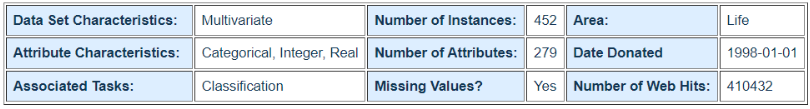

# === PROSES COVERTING DATAFRAME ===

In [ ]:
#converting dataframe
dataArrhy = pd.read_csv("arrhythmia.data", header=None, 
                        #na_values='?'
                        ) #mengubah missing data ke na_values(NaN)
dataArrhy.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
dataArrhy.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [ ]:
dataArrhy.shape

(452, 280)

In [ ]:
dataArrhy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [ ]:
dataArrhy.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
0,452.0,46.471239,16.466631,0.0,36.0,47.0,58.0,83.0
1,452.0,0.550885,0.497955,0.0,0.0,1.0,1.0,1.0
2,452.0,166.188053,37.170340,105.0,160.0,164.0,170.0,780.0
3,452.0,68.170354,16.590803,6.0,59.0,68.0,79.0,176.0
4,452.0,88.920354,15.364394,55.0,80.0,86.0,94.0,188.0


# === PRE-PROCESSING DATA ===

Melihat banyak missing data dan direplace ke NaN (jika disaat proses membaca dataset sudah dideklarasikan na_values, maka totalnya 0)

In [ ]:
#counting missing data
count = 0
for i in range(0,452):
    for j in range(0,280):
        if (dataArrhy.iloc[i,j] == '?'):
            count = count + 1
print(count)
dataArrhy = dataArrhy.replace('?', np.NaN)

408


In [ ]:
dataArrhy.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
275    0
276    0
277    0
278    0
279    0
Length: 280, dtype: int64

Distribusi penyeberan dari data yang hilang (missing data)

Text(0, 0.5, 'Jumlah NaN')

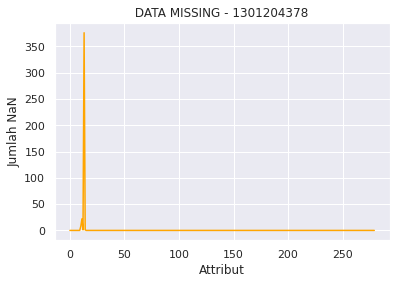

In [ ]:
#visualisasi dari penyebaran missing data
pd.isnull(dataArrhy).sum().plot(color='orange')
plt.title(" DATA MISSING - 1301204378 ")
plt.xlabel('Attribut')
plt.ylabel('Jumlah NaN')

Text(0, 0.5, 'Jumlah NaN')

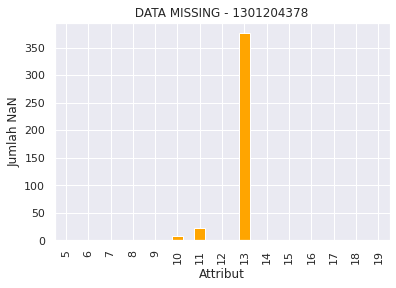

In [ ]:
pd.isnull(dataArrhy).sum()[5:20].plot(kind='bar',color='orange')
plt.title(" DATA MISSING - 1301204378 ")
plt.xlabel('Attribut')
plt.ylabel('Jumlah NaN')

Drop kolom 13 karena terdapat banyak data yang hilang

---

Saya memilih untuk DROP attribut ke13

In [ ]:
#dropping column 13
dataArrhy.drop(columns = 13, inplace=True)

In [ ]:
dataArrhy = pd.DataFrame(dataArrhy)
dataArrhy.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


Mengolah data yang bernilai null

In [ ]:
dataArrhy.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
275    0
276    0
277    0
278    0
279    0
Length: 279, dtype: int64

In [ ]:
#checking missing data yang tersisa
dataArrhy.isna().sum().sum()

32

In [ ]:
#replacing missing data
dataArrhy = dataArrhy.replace("?", np.nan)
dataArrhy.isin(["?"]).sum().sum()

0

In [ ]:
#filling column missing data dengan rata-rata kolom
dataArrhy = dataArrhy.fillna(dataArrhy.mean())
dataArrhy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


Karena masih ada data yang bertipe OBJECT akan diubah menjadi tipe numerik

In [ ]:
#replacing OBJECT to NUMERIC
kolom = dataArrhy.columns[dataArrhy.dtypes.eq("object")]
dataArrhy[kolom] = dataArrhy[kolom].apply(pd.to_numeric, errors="coerce")
dataArrhy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 279 entries, 0 to 279
dtypes: float64(124), int64(155)
memory usage: 985.3 KB


Karena dataset belum memiliki nama per kolomnya (dataset dan nama kolom tabel dipisah) akan ditambahkan secara manual

In [ ]:
#filling nama column dengan manual dari variabel dataFix
dataFix_columns = [ "Age","Sex","Height","Weight","QRS_Dur", "P-R_Int","Q-T_Int",
"T_Int","P_Int","QRS","T","P","J","Heart_Rate","Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave",
"Int_Def","Rag_R_Nom","Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279",
"ClassCode"]

In [ ]:
#Deklarasi kolom yang sudah ditambahkan
dataArrhy.columns = dataFix_columns
dataArrhy

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,ClassCode
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
dataArrhyColumns = dataArrhy.columns.values
print('Columns in Arrhythmia Dataset\n {}'.format(dataArrhyColumns))

Columns in Arrhythmia Dataset
 ['Age' 'Sex' 'Height' 'Weight' 'QRS_Dur' 'P-R_Int' 'Q-T_Int' 'T_Int'
 'P_Int' 'QRS' 'T' 'P' 'J' 'Heart_Rate' 'Q_Wave' 'R_Wave' 'S_Wave'
 "R'_Wave" "S'_Wave" 'Int_Def' 'Rag_R_Nom' 'Diph_R_Nom' 'Rag_P_Nom'
 'Diph_P_Nom' 'Rag_T_Nom' 'Diph_T_Nom' 'DII00' 'DII01' 'DII02' 'DII03'
 'DII04' 'DII05' 'DII06' 'DII07' 'DII08' 'DII09' 'DII10' 'DII11' 'DIII00'
 'DIII01' 'DIII02' 'DIII03' 'DIII04' 'DIII05' 'DIII06' 'DIII07' 'DIII08'
 'DIII09' 'DIII10' 'DIII11' 'AVR00' 'AVR01' 'AVR02' 'AVR03' 'AVR04'
 'AVR05' 'AVR06' 'AVR07' 'AVR08' 'AVR09' 'AVR10' 'AVR11' 'AVL00' 'AVL01'
 'AVL02' 'AVL03' 'AVL04' 'AVL05' 'AVL06' 'AVL07' 'AVL08' 'AVL09' 'AVL10'
 'AVL11' 'AVF00' 'AVF01' 'AVF02' 'AVF03' 'AVF04' 'AVF05' 'AVF06' 'AVF07'
 'AVF08' 'AVF09' 'AVF10' 'AVF11' 'V100' 'V101' 'V102' 'V103' 'V104' 'V105'
 'V106' 'V107' 'V108' 'V109' 'V110' 'V111' 'V200' 'V201' 'V202' 'V203'
 'V204' 'V205' 'V206' 'V207' 'V208' 'V209' 'V210' 'V211' 'V300' 'V301'
 'V302' 'V303' 'V304' 'V305' 'V306' 'V307' 

Menampilkan informasi dengan nama kolom yang sudah ditambahkan secara manual

In [ ]:
#showing setelah ditambahkan dataFix
dataArrhy.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
Age,452.0,46.471239,16.466631,0.0,36.0,47.0,58.0,83.0
Sex,452.0,0.550885,0.497955,0.0,0.0,1.0,1.0,1.0
Height,452.0,166.188053,37.170340,105.0,160.0,164.0,170.0,780.0
Weight,452.0,68.170354,16.590803,6.0,59.0,68.0,79.0,176.0
QRS_Dur,452.0,88.920354,15.364394,55.0,80.0,86.0,94.0,188.0


In [ ]:
dataArrhy.describe().transpose().tail()

,count,mean,std,min,25%,50%,75%,max
V6276,452.0,0.514823,0.347531,-0.8,0.40,0.50,0.700,2.4
V6277,452.0,1.222345,1.426052,-6.0,0.50,1.35,2.100,6.0
V6278,452.0,19.326106,13.503922,-44.2,11.45,18.10,25.825,88.8
V6279,452.0,29.473230,18.493927,-38.6,17.55,27.90,41.125,115.9
ClassCode,452.0,3.880531,4.407097,1.0,1.00,1.00,6.000,16.0


In [ ]:
dataArrhy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 279 entries, Age to ClassCode
dtypes: float64(124), int64(155)
memory usage: 985.3 KB


# === VISUALISASI DATA ===

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cedc636d0>,
      dtype=object)

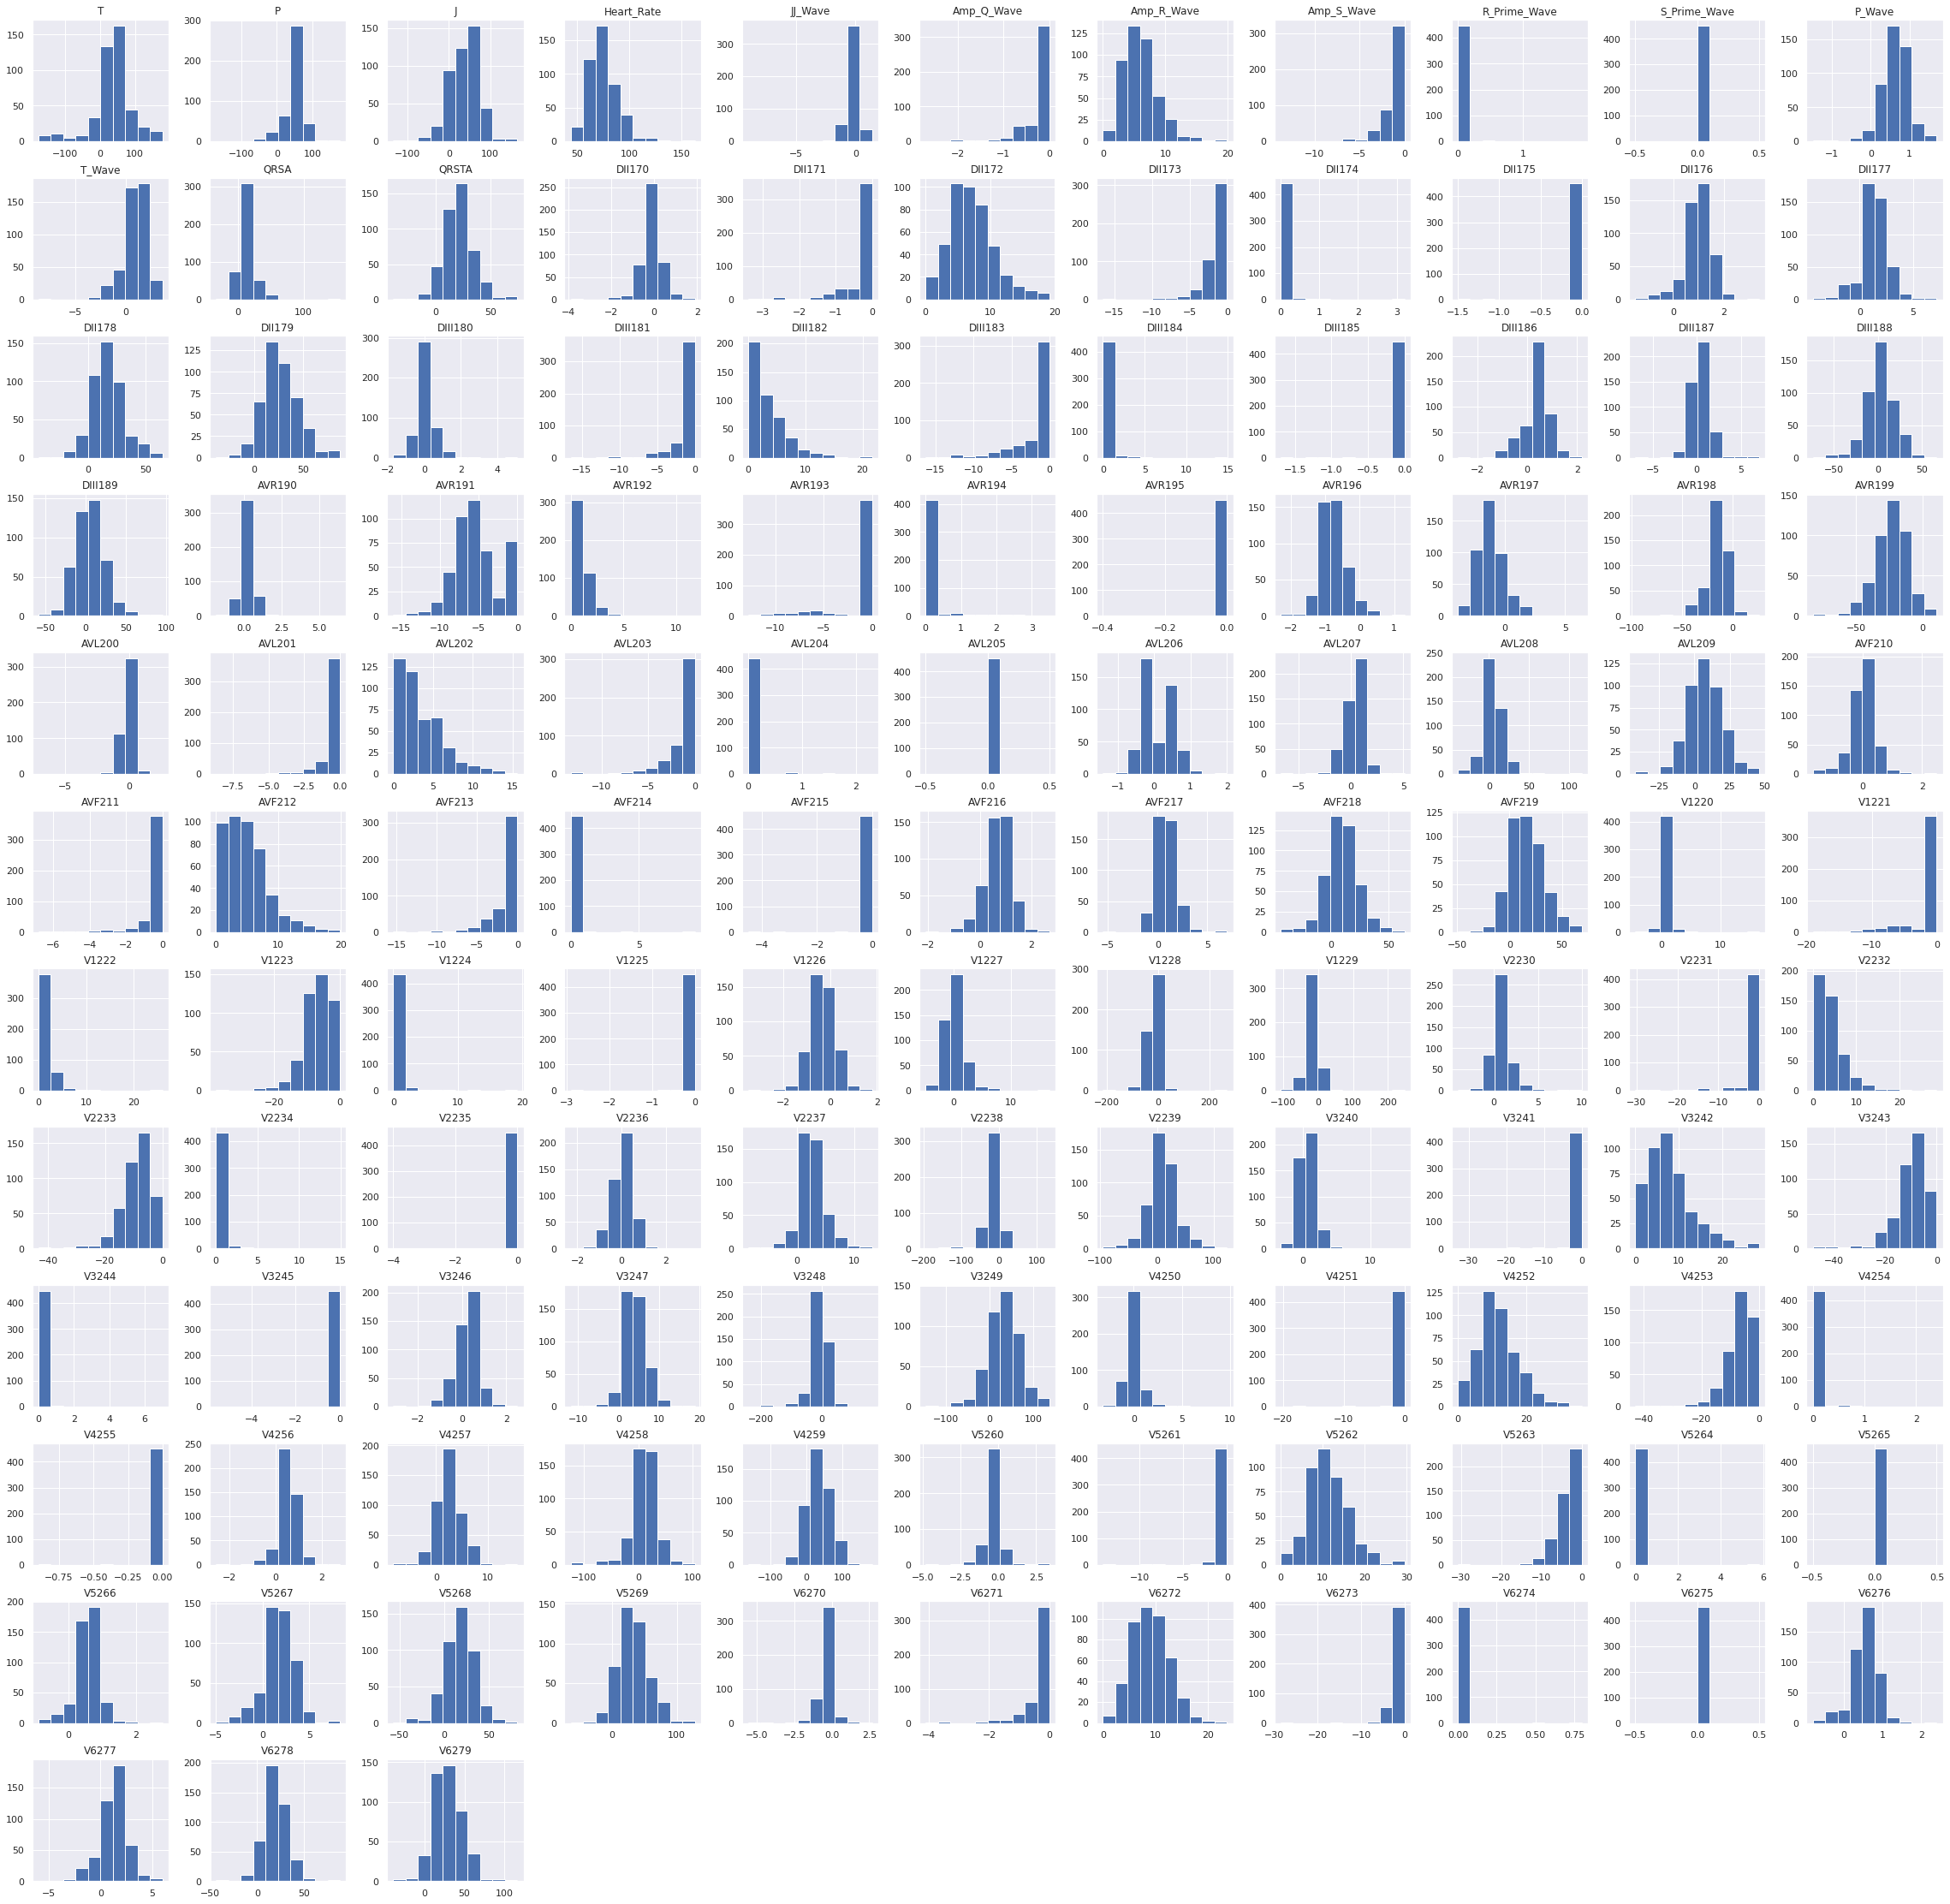

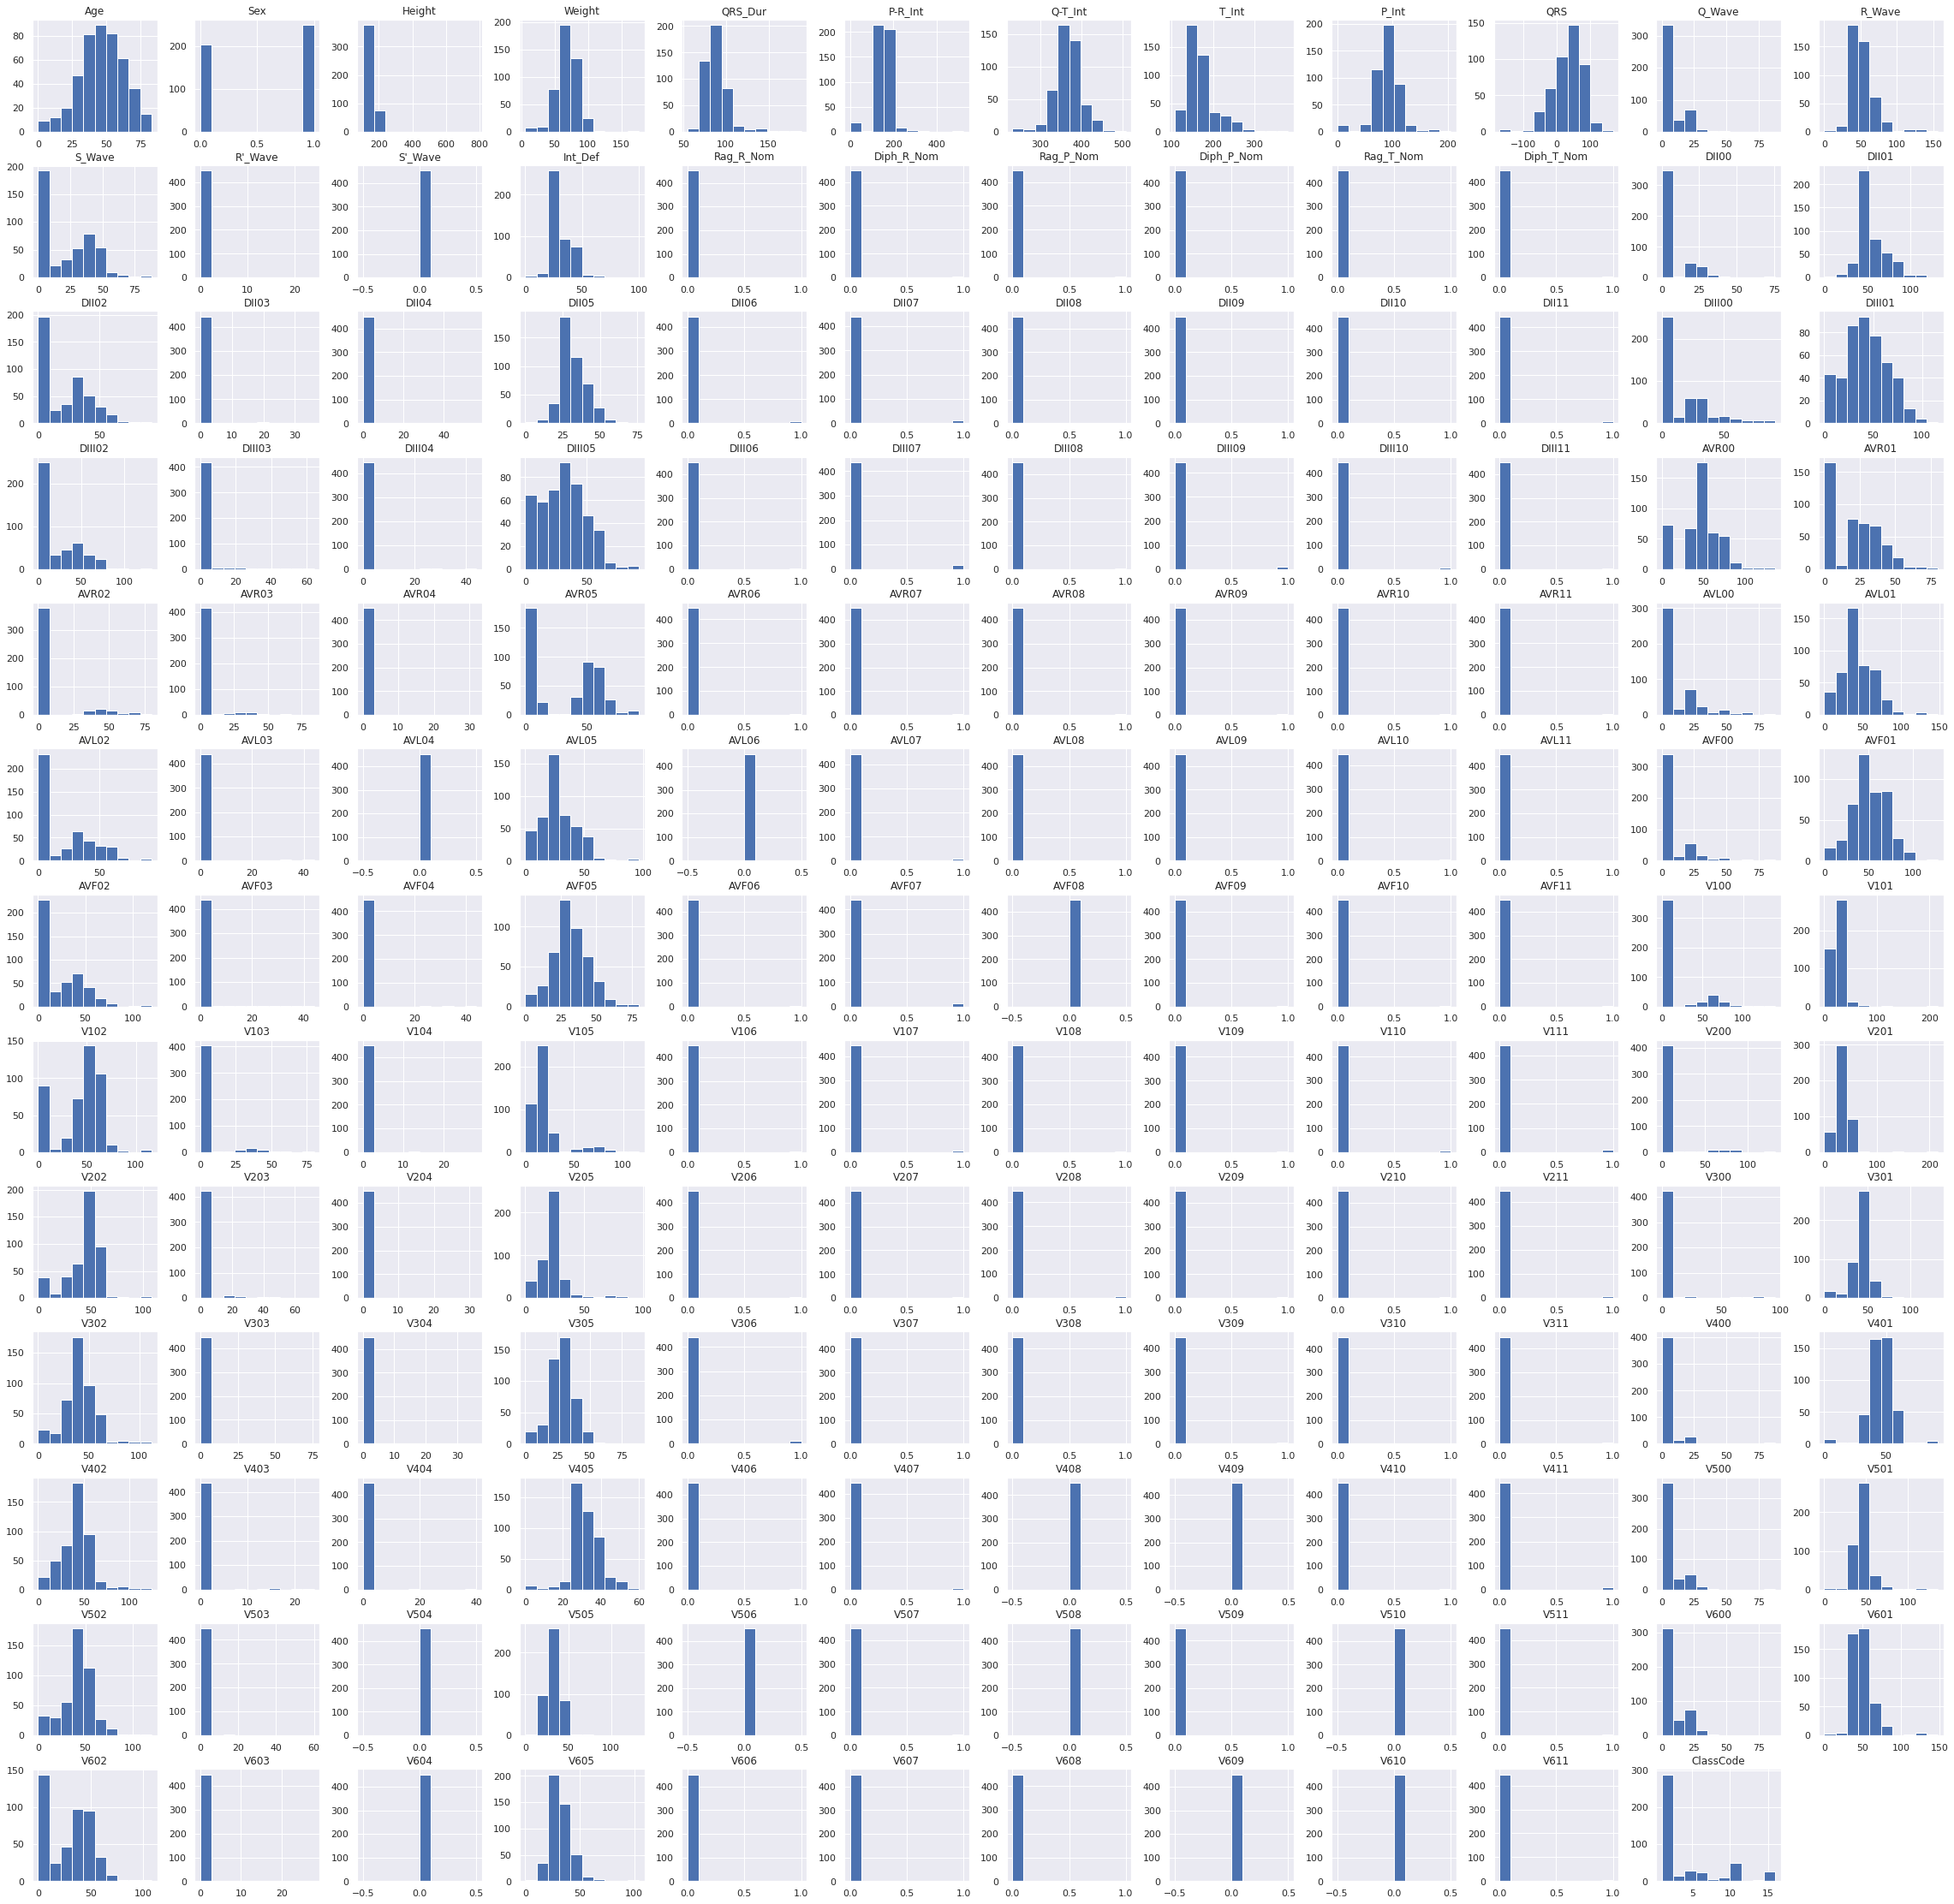

In [ ]:
#Histogram distribusi data
dataArrhy[dataArrhy.dtypes[(dataArrhy.dtypes=="float")].index.values].hist(figsize=[40,40])
dataArrhy[dataArrhy.dtypes[(dataArrhy.dtypes=="int64")].index.values].hist(figsize=[40,40])

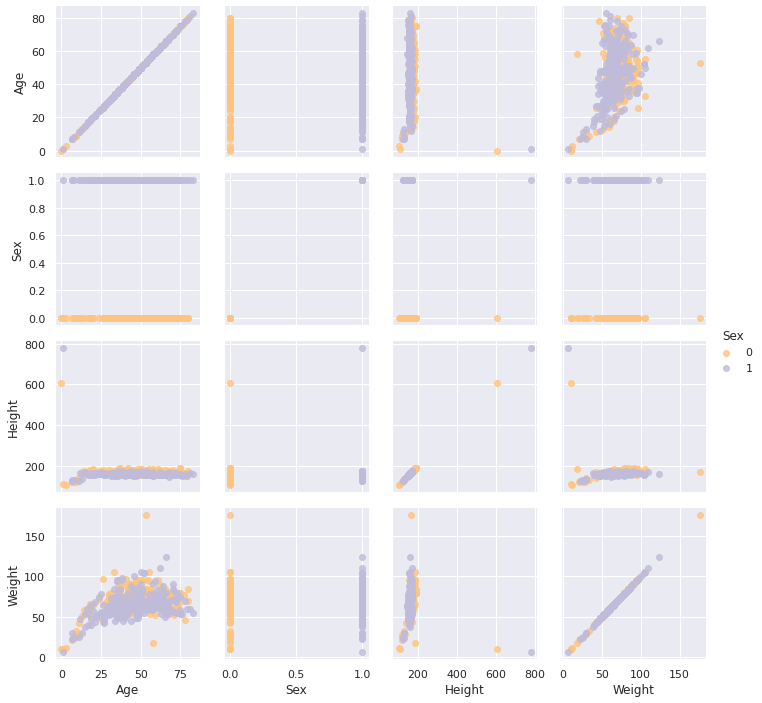

In [ ]:
#visualisasi persebaran data #1
g = sns.PairGrid(dataArrhy, vars=['Age', 'Sex', 'Height', 'Weight'], #data manusia
                 hue='Sex', palette='PuOr')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

Hasil dari plot persebaran diatas, ada beberapa pencilan dalam atribut 'height' dan 'weight'. Disini saya akan memeriksa tinggi dan berat maksimum.

In [ ]:
#sorting untuk atribut height (descending)
sorted(dataArrhy['Height'], reverse=True)[:10]

[780, 608, 190, 190, 190, 188, 186, 186, 186, 185]

Karena tinggi manusia normal tidak ada yang sampai 780 / 608

---

Saya asumsikan dan mengganti 780 dan 608 dengan 180cm dan 108cm

---

Untuk atribut lain bisa diexplore dengan data.unique (selain height, nilai atribut normal)

In [ ]:
#replacing height yang tidak normal
dataArrhy['Height']=dataArrhy['Height'].replace(608,108)
dataArrhy['Height']=dataArrhy['Height'].replace(780,180)

sorted(dataArrhy['Weight'], reverse=True)[:10]

[176, 124, 110, 106, 105, 105, 104, 104, 100, 98]

Asumsikan berat badan 176 normal

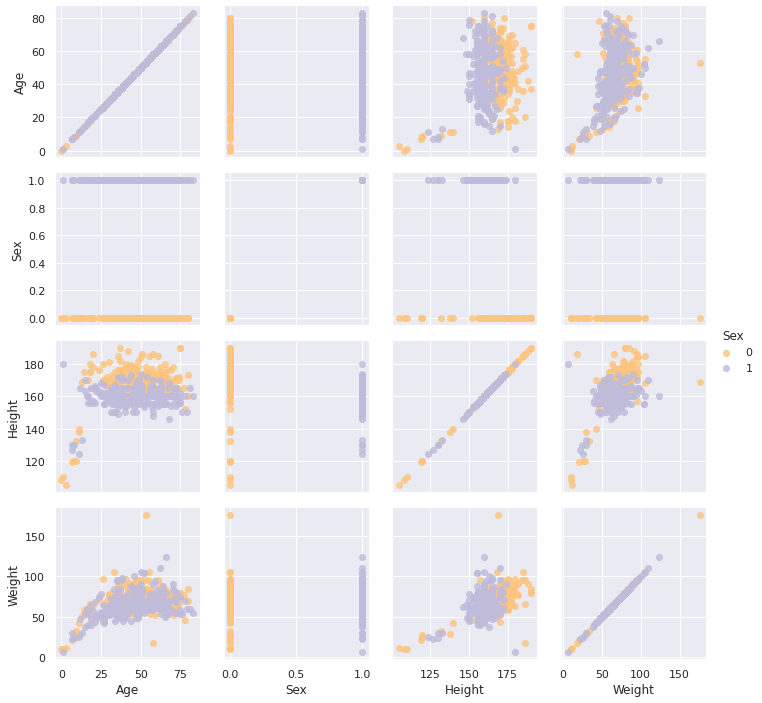

In [ ]:
#visualisasi persebaran data #1 yang sudah disesuaikan
g = sns.PairGrid(dataArrhy, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='PuOr')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

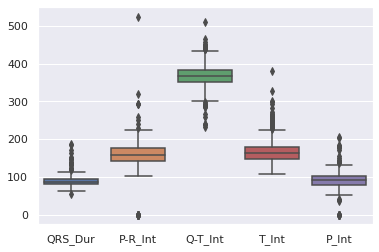

In [ ]:
#visualisasi persebaran data #2
sns.boxplot(data=dataArrhy[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

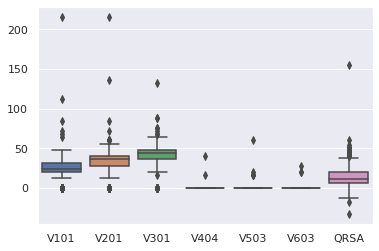

In [ ]:
#visualisasi persebaran data #3
sns.boxplot(data=dataArrhy[["V101", "V201", "V301", "V404", "V503", "V603", "QRSA"]]);

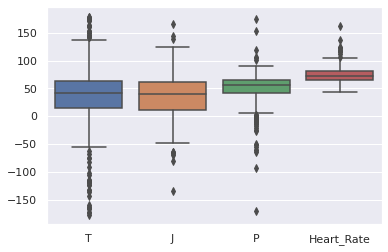

In [ ]:
#visualisasi persebaran data #4
sns.boxplot(data=dataArrhy[["T", "J", "P", "Heart_Rate"]]);

Hasil visualisasi diatas, terdapat pencilan data pada PR Interval, V101, V201, V301, V501 dan T, J, P, Heart_Rate. Karena data yang digunakan sangat bias, Saya asumsikan untuk tidak menghapus data pencilan tersebut dan memilih untuk tetap disimpan.

---
Cek data atribut mana yang masih terdapat pencilan


In [ ]:
#mencari tahu data pencilan pada V101
dataArrhy["V101"].value_counts().sort_index(ascending=False)

216     1
112     1
84      1
72      1
68      1
64      1
48      6
44      6
40     13
36     36
32     63
28     81
24     88
20     57
16     13
12      4
0      79
Name: V101, dtype: int64

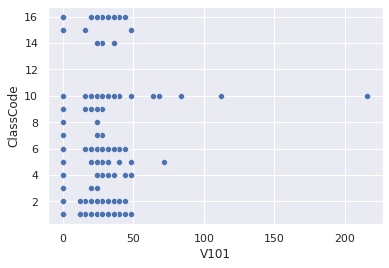

In [ ]:
#Checking persebaran data #1
sns.scatterplot(x='V101',y='ClassCode',data=dataArrhy)

Tidak banyak data pencilan di kolom V101. Jadi kita menggunakan mean untuk mengisi nilai null.

In [ ]:
#filling kolom V101 dengan mean
dataArrhy['V101']=dataArrhy['V101'].fillna(dataArrhy['V101'].mean())

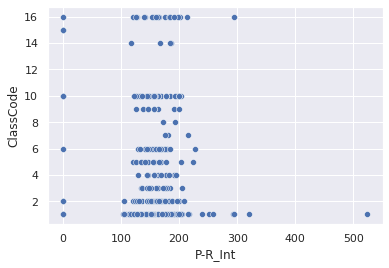

In [ ]:
#Checking persebaran data #2
sns.scatterplot(x='P-R_Int',y='ClassCode',data=dataArrhy)

Ada banyak data pencilan di kolom ini. Kita menggunakan median untuk mengisi nilai nol.

In [ ]:
#filling kolom V101 dengan median
dataArrhy['P-R_Int']=dataArrhy['P-R_Int'].fillna(dataArrhy['P-R_Int'].median())

Begitu Juga untuk Data yang lain  (PR Interval, V101, V201, V301, V501 dan T, J, P, Heart_Rate)

---

Dengan Kriteria: 

Jika atribut tersebut memiliki sedikit pencilan => Mean

Jika atribut tersebut memiliki banyak pencilan => Median

Jika atribut tersebut memiliki sangat banyak pencilan => DROP

In [ ]:
#filling kolom T dengan median
dataArrhy['T']=dataArrhy['T'].fillna(dataArrhy['T'].median())

In [ ]:
#filling kolom J dengan mean
dataArrhy['J']=dataArrhy['J'].fillna(dataArrhy['J'].mean())

In [ ]:
#filling kolom Heart_Rate dengan mean
dataArrhy['Heart_Rate']=dataArrhy['Heart_Rate'].fillna(dataArrhy['Heart_Rate'].mean())

In [ ]:
dataArrhy.drop(['P'], inplace=True, axis=1)

In [ ]:
dataArrhy.isnull().sum().sum()

0

In [ ]:
dataArrhy.isnull().sum().head(20)

Age           0
Sex           0
Height        0
Weight        0
QRS_Dur       0
P-R_Int       0
Q-T_Int       0
T_Int         0
P_Int         0
QRS           0
T             0
J             0
Heart_Rate    0
Q_Wave        0
R_Wave        0
S_Wave        0
R'_Wave       0
S'_Wave       0
Int_Def       0
Rag_R_Nom     0
dtype: int64

In [ ]:
dataArrhy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,452.0,46.471239,16.466631,0.0,36.00,47.00,58.000,83.0
Sex,452.0,0.550885,0.497955,0.0,0.00,1.00,1.000,1.0
Height,452.0,163.754425,10.743300,105.0,160.00,164.00,170.000,190.0
Weight,452.0,68.170354,16.590803,6.0,59.00,68.00,79.000,176.0
QRS_Dur,452.0,88.920354,15.364394,55.0,80.00,86.00,94.000,188.0
...,...,...,...,...,...,...,...,...
V6276,452.0,0.514823,0.347531,-0.8,0.40,0.50,0.700,2.4
V6277,452.0,1.222345,1.426052,-6.0,0.50,1.35,2.100,6.0
V6278,452.0,19.326106,13.503922,-44.2,11.45,18.10,25.825,88.8
V6279,452.0,29.473230,18.493927,-38.6,17.55,27.90,41.125,115.9


# **=== PROSES ANN ===**

---

Train model menggunakan algoritma ANN

In [ ]:
#Memisahkan data menjadi data training dan data testing
y = dataArrhy["ClassCode"]
x = dataArrhy.drop(["ClassCode"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=3) 

Saya mencoba melihat ukuran dari error data test yang akan dicoba

In [ ]:
#Fungsi untuk measure error
def score_dataset(y_test, x_test, pipeline):
  df_preds = pd.DataFrame((map(round, pipeline.predict(x_test))))
  y_test.index = range(0, len(y_test))
  df_reals = pd.DataFrame(y_test)
  df_reals = df_reals.values.tolist()
  df_preds = df_preds.values.tolist()

  count = 0
  for i in range(len(df_preds)):
    if df_preds[i] == df_reals[i]:
      count += 1
  score = (count/len(y_test))*100
  return score

Lihat bagaimana model bekerja berdasarkan parameter n_estimate yang berbeda. Dengan menggunakan fungsi score_dataset untuk memeriksa kesalahan dalam persentase

In [ ]:
#Checking error (kesalahan)
scores = ['n_estimate', 'error in %']
df_score = pd.DataFrame(index=range(1, 280), columns=scores)
for i in range(1, 280):
  my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer(strategy='constant', fill_value=0.0)), ('model', RandomForestClassifier(n_estimators=i, random_state=0))])
  my_pipeline.fit(x_train, y_train)
  df_score.loc[i, 'n_estimate'] = i
  df_score.loc[i, 'error in %'] = score_dataset(y_test, x_test, my_pipeline)

In [ ]:
df_score

,n_estimate,error in %
1,1,63.736264
2,2,67.032967
3,3,65.934066
4,4,67.032967
5,5,70.32967
...,...,...
275,275,72.527473
276,276,72.527473
277,277,72.527473
278,278,72.527473


In [ ]:
#minmax scalling
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)



---



In [ ]:
#Split kolom ClassCode
y = dataArrhy["ClassCode"]
x = dataArrhy.drop(["ClassCode"], axis=1)
y = np.array(y)
x = np.array(x)
x [:10], y[:10]

(array([[ 75. ,   0. , 190. , ...,   2.9,  23.3,  49.4],
        [ 56. ,   1. , 165. , ...,   2.1,  20.4,  38.8],
        [ 54. ,   0. , 172. , ...,   3.4,  12.3,  49. ],
        ...,
        [ 49. ,   1. , 162. , ...,   0.5,  15.8,  19.8],
        [ 44. ,   0. , 168. , ...,   2.1,  12.5,  30.9],
        [ 50. ,   1. , 167. , ...,   0.9,  20.1,  25.1]]),
 array([ 8,  6, 10,  1,  7, 14,  1,  1,  1, 10]))

In [ ]:
#Encoding  kolom classcode
l_encode = LabelEncoder()
l_encode.fit(y)
y = l_encode.transform(y)
y = to_categorical(y)

In [ ]:
#memisah dataset menjadi 2
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.3, random_state = 0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((316, 277), (316, 13), (136, 277), (136, 13))

In [ ]:
#model = Sequential()
#model.add(Dense(64, input_dim = 30, activation = 'sigmoid'))
#model.add(Dense(32, activation = 'relu'))
#model.add(Dense(32, activation = 'sigmoid'))
#model.add(Dense(1, activation='tanh'))

#model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#model.fit(x_train, y_train, epochs = 50, batch_size = 50)

Epoch 1/45
10/10 [==============================] - 2s 62ms/step - loss: 2.0430 - accuracy: 0.4873 - val_loss: 1.9169 - val_accuracy: 0.5294
Epoch 2/45
10/10 [==============================] - 0s 33ms/step - loss: 1.7712 - accuracy: 0.5475 - val_loss: 1.7868 - val_accuracy: 0.5294
Epoch 3/45
10/10 [==============================] - 0s 42ms/step - loss: 1.6937 - accuracy: 0.5475 - val_loss: 1.7862 - val_accuracy: 0.5294
Epoch 4/45
10/10 [==============================] - 0s 37ms/step - loss: 1.6736 - accuracy: 0.5475 - val_loss: 1.7751 - val_accuracy: 0.5294
Epoch 5/45
10/10 [==============================] - 0s 38ms/step - loss: 1.6746 - accuracy: 0.5475 - val_loss: 1.7682 - val_accuracy: 0.5294
Epoch 6/45
10/10 [==============================] - 0s 34ms/step - loss: 1.6740 - accuracy: 0.5475 - val_loss: 1.7601 - val_accuracy: 0.5294
Epoch 7/45
10/10 [==============================] - 0s 31ms/step - loss: 1.6907 - accuracy: 0.5475 - val_loss: 1.7475 - val_accuracy: 0.5294
Epoch 8/45
10

[]

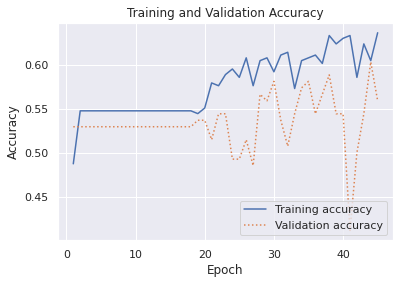

In [ ]:
dataArrhy_len = len(dataArrhy.columns)-1

model = Sequential()
model.add(Dense(452, input_dim = dataArrhy_len, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(13, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=45)
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)

2/2 [==============================] - 0s 13ms/step - loss: 1.5468 - accuracy: 0.5588


In [ ]:
prediction = model.predict(x_test)

5/5 [==============================] - 0s 11ms/step


In [ ]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, 'Dependense accuracy on n_estimators')

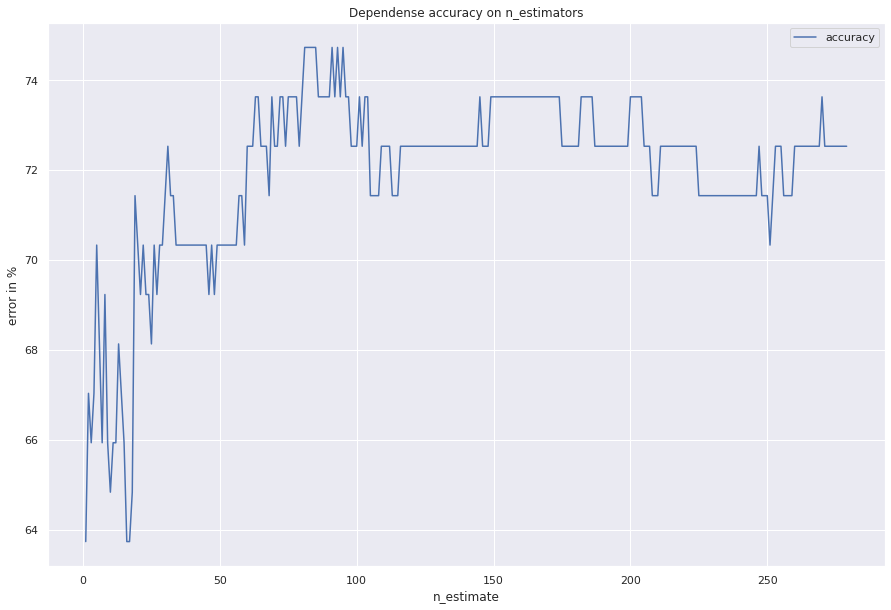

In [ ]:
#Dependense dari akurasi #1
df_score['n_estimate'] = df_score['n_estimate'].astype(int)
df_score['error in %'] = df_score['error in %'].astype(float)

plt.figure(figsize=(15, 10))
sns.lineplot(x=df_score['n_estimate'], y=df_score['error in %'], label='accuracy')
plt.title('Dependense accuracy on n_estimators')

Hasil akurasi diatas tidak bagus. Nilai puncak akurasi sebesar 73% dengan n_estimate dari 125 hingga 150. Mungkin, ini disebabkan nilai-nilai dari beberapa kelas sama sekali tidak ada, dan yang lain disajikan dalam sejumlah kecil nilai, sehingga beberapa dari mereka mungkin tidak masuk data training atau data testing.

n_estimate yang lebih besar juga tidak menunjukkan hasil yang baik.